In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
main_frequency = 1e6  # main frequency of the pulse
pulse_slope = 3  # slope of the pulse envelope: 1 is Gaussian, large number is square
num_cycles = 5  # approx number of cycles in the pulse
angular_frequency = 2 * np.pi * main_frequency # omega
pulse_tail_factor = 2 * num_cycles  # default 2*num_cycles, the flat part/tails of the pulse
time_start = -(1 / main_frequency) * pulse_tail_factor  # left side of the pulse to begin plotting
time_increment = 1 / main_frequency / 200  # sampling time, i.e., time between points, here in pts per cycle
time_end = (1 / main_frequency) * pulse_tail_factor  # right side of the pulse to end plotting
time_array = np.arange(time_start, time_end, time_increment)  # array with all time points

In [3]:
# Envelope
envelope = np.exp(-np.abs((angular_frequency * time_array / (np.pi * num_cycles)) ** (2 * pulse_slope)))

# Pulse
pulse = np.sin(angular_frequency * time_array) * envelope

# Number of points in the pulse
num_points = len(pulse)

In [4]:
# FFT of the pulse
pulse_fft = np.abs(np.fft.fft(pulse)) # discrete FFT
pulse_fft_max = np.max(pulse_fft)
normalized_pulse_fft = pulse_fft[:num_points // 2] / pulse_fft_max  # normalized FFT with respect to the maximum, 
# We slice the FFT result to take only the first half of the FFT output. The FFT of a real-valued signal is symmetric, so we only need the first half.
sampling_frequency = 1 / (num_points * time_increment)  # sampling frequency, frequency step
fundamental_frequency_index = main_frequency / sampling_frequency  # index/bin number of the fundamental frequency

# Frequency array in Hz
frequency_array = sampling_frequency * np.arange(num_points // 2)
pulse_fft_dB = 20 * np.log10(normalized_pulse_fft)  # logarithm of the FFT

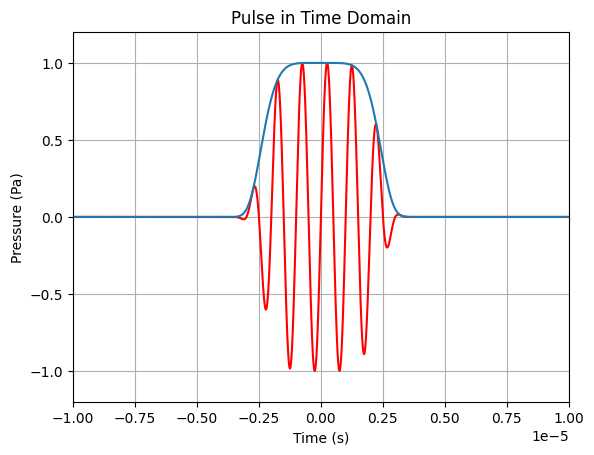

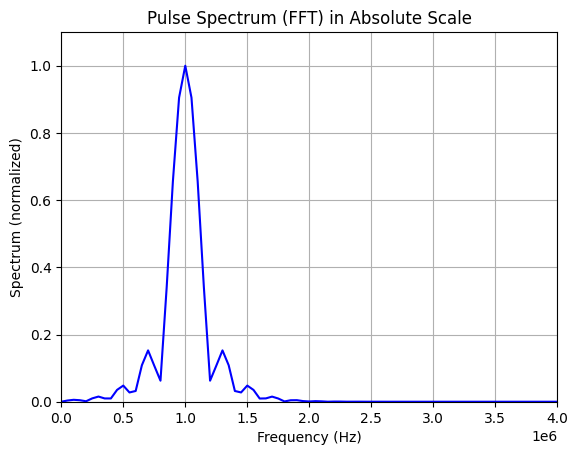

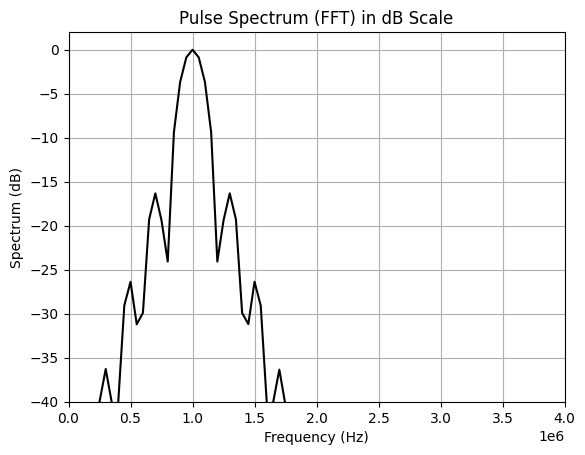

In [10]:
# Plotting
plt.figure(1)  # pulse in the time domain
plt.plot(time_array, pulse, 'r')
plt.plot(time_array, envelope)
plt.grid(True)
plt.axis([time_start, time_end, -1.2, 1.2])
plt.xlabel('Time (s)')
plt.ylabel('Pressure (Pa)')
plt.title('Pulse in Time Domain')

plt.figure(2)  # pulse spectrum (FFT) in absolute scale
plt.plot(frequency_array, normalized_pulse_fft, 'b')
plt.grid(True)
plt.axis([0, 4 * main_frequency, 0, 1.1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectrum (normalized)')
plt.title('Pulse Spectrum (FFT) in Absolute Scale')

plt.figure(3)  # pulse spectrum (FFT) in dB scale
plt.plot(frequency_array, pulse_fft_dB, 'k')
plt.grid(True)
plt.axis([0, 4 * main_frequency, -40, 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectrum (dB)')
plt.title('Pulse Spectrum (FFT) in dB Scale')

plt.show()